# Machine Learning Assignment-1

## Name: Sai Aditya Garlapati   
## Student-ID: 18125760054

In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Question-1

In [2]:
bank= pd.read_csv("C:/Users/Aditya/Documents/Manipal Sem 2/Machine Learning/Kathirmani/bank-full.csv",sep=';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Creating Dummies to Bank Dataset

In [5]:
bank_dummy = pd.get_dummies(bank.drop('y',axis=1))
bank_dummy['y']=bank['y']
bank_dummy.shape


(45211, 52)

## Decision Tree Classifier on Bank Dataset

In [6]:
train,test =train_test_split(bank_dummy,test_size=0.3,random_state=100)

train_y =train['y']
test_y =test['y']

train_x=train.drop('y',axis=1)
test_x=test.drop('y',axis=1)

model =DecisionTreeClassifier(random_state=100)
model.fit(train_x,train_y)

test_pred =model.predict(test_x)
bank_pred =pd.DataFrame({'actual':test_y,'predicted':test_pred})
bank_pred['pred_status']=bank_pred['actual'] == bank_pred['predicted']
bank_pred[bank_pred['pred_status']==True].shape[0]/bank_pred.shape[0] *100

87.72485992332645

In [7]:
# True Negative
tn_d=bank_pred[(bank_pred['predicted']=='no') & (bank_pred['actual']=='no')].shape[0]

# False Positive
fp_d=bank_pred[(bank_pred['predicted']=='yes') & (bank_pred['actual']=='no')].shape[0]
# False Negative
fn_d=bank_pred[(bank_pred['predicted']=='no') & (bank_pred['actual']=='yes')].shape[0]

# Ture positive
tp_d=bank_pred[(bank_pred['predicted']=='yes') & (bank_pred['actual']=='yes')].shape[0]

accuracy = (tp_d + tn_d) / (tn_d + fp_d + fn_d + tp_d)
sensitivity = tp_d / (tp_d + fn_d)
specificity = tn_d / (tn_d + fp_d)

metrics = pd.DataFrame({'Decision Tree':[tp_d, tn_d, fp_d, fn_d, accuracy, sensitivity, specificity]}, 
           index = ['True Negative', 'True Negative', 'False Positive', 'False Negative', 'Accuracy', 'Sensitivity', 'Specificity'])

In [8]:
confusion_matrix(bank_pred['actual'],bank_pred['predicted'])

tn_d,fp_d,fn_d,tp_d=confusion_matrix(bank_pred['actual'],
                            bank_pred['predicted']).ravel()

## Random Forest Classifier on Bank Dataset

In [9]:
train,test =train_test_split(bank_dummy,test_size=0.3,random_state=100)

train_y =train['y']
test_y =test['y']

train_x=train.drop('y',axis=1)
test_x=test.drop('y',axis=1)

model =RandomForestClassifier(random_state=100)
model.fit(train_x,train_y)

test_pred =model.predict(test_x)
bank_pred =pd.DataFrame({'actual':test_y,'predicted':test_pred})
bank_pred['pred_status']=bank_pred['actual'] == bank_pred['predicted']
bank_pred[bank_pred['pred_status']==True].shape[0]/bank_pred.shape[0] *100

89.97345915659098

In [10]:
# True Negative
tn_d=bank_pred[(bank_pred['predicted']=='no') & (bank_pred['actual']=='no')].shape[0]

# False Positive
fp_d=bank_pred[(bank_pred['predicted']=='yes') & (bank_pred['actual']=='no')].shape[0]
# False Negative
fn_d=bank_pred[(bank_pred['predicted']=='no') & (bank_pred['actual']=='yes')].shape[0]

# Ture positive
tp_d=bank_pred[(bank_pred['predicted']=='yes') & (bank_pred['actual']=='yes')].shape[0]


accuracy = (tp_d + tn_d) / (tn_d + fp_d + fn_d + tp_d)
sensitivity = tp_d / (tp_d + fn_d)
specificity = tn_d / (tn_d + fp_d)

metrics['Random Forest'] = [tp_d, tn_d, fp_d, fn_d, accuracy, sensitivity, specificity]

## Ada Boost on Bank Dataset

In [11]:
train,test =train_test_split(bank_dummy,test_size=0.3,random_state=100)

train_y =train['y']
test_y =test['y']

train_x=train.drop('y',axis=1)
test_x=test.drop('y',axis=1)

model =AdaBoostClassifier(random_state=100)
model.fit(train_x,train_y)

test_pred =model.predict(test_x)
bank_pred =pd.DataFrame({'actual':test_y,'predicted':test_pred})
bank_pred['pred_status']=bank_pred['actual'] == bank_pred['predicted']
bank_pred[bank_pred['pred_status']==True].shape[0]/bank_pred.shape[0] *100

89.72279563550575

In [12]:
# True Negative
tn_d=bank_pred[(bank_pred['predicted']=='no') & (bank_pred['actual']=='no')].shape[0]

# False Positive
fp_d=bank_pred[(bank_pred['predicted']=='yes') & (bank_pred['actual']=='no')].shape[0]
# False Negative
fn_d=bank_pred[(bank_pred['predicted']=='no') & (bank_pred['actual']=='yes')].shape[0]

# Ture positive
tp_d=bank_pred[(bank_pred['predicted']=='yes') & (bank_pred['actual']=='yes')].shape[0]


accuracy = (tp_d + tn_d) / (tn_d + fp_d + fn_d + tp_d)
sensitivity = tp_d / (tp_d + fn_d)
specificity = tn_d / (tn_d + fp_d)

metrics['Ada Boost'] = [tp_d, tn_d, fp_d, fn_d, accuracy, sensitivity, specificity]

## K Neighbour Classifier on Bank Data

In [13]:
train,test =train_test_split(bank_dummy,test_size=0.3,random_state=100)

train_y =train['y']
test_y =test['y']

train_x=train.drop('y',axis=1)
test_x=test.drop('y',axis=1)

model =KNeighborsClassifier()
model.fit(train_x,train_y)

test_pred =model.predict(test_x)
bank_pred =pd.DataFrame({'actual':test_y,'predicted':test_pred})
bank_pred['pred_status']=bank_pred['actual'] == bank_pred['predicted']
bank_pred[bank_pred['pred_status']==True].shape[0]/bank_pred.shape[0] *100

88.05662046593925

In [14]:
# True Negative
tn_d=bank_pred[(bank_pred['predicted']=='no') & (bank_pred['actual']=='no')].shape[0]

# False Positive
fp_d=bank_pred[(bank_pred['predicted']=='yes') & (bank_pred['actual']=='no')].shape[0]
# False Negative
fn_d=bank_pred[(bank_pred['predicted']=='no') & (bank_pred['actual']=='yes')].shape[0]

# Ture positive
tp_d=bank_pred[(bank_pred['predicted']=='yes') & (bank_pred['actual']=='yes')].shape[0]


accuracy = (tp_d + tn_d) / (tn_d + fp_d + fn_d + tp_d)
sensitivity = tp_d / (tp_d + fn_d)
specificity = tn_d / (tn_d + fp_d)

metrics['K Neighbors'] = [tp_d, tn_d, fp_d, fn_d, accuracy, sensitivity, specificity]

In [15]:
metrics

,Decision Tree,Random Forest,Ada Boost,K Neighbors
True Negative,775.000000,561.000000,585.000000,434.000000
True Negative,11124.000000,11643.000000,11585.000000,11510.000000
False Positive,861.000000,342.000000,400.000000,475.000000
False Negative,804.000000,1018.000000,994.000000,1145.000000
Accuracy,0.877249,0.899735,0.897228,0.880566
Sensitivity,0.490817,0.355288,0.370488,0.274858
Specificity,0.928160,0.971464,0.966625,0.960367


## Question - 2

## Classifing KNN without using KNN library import

In [16]:
from sklearn.metrics.pairwise import euclidean_distances


In [17]:
iris =pd.read_csv("iris.csv")

In [18]:
iris = iris.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],axis=1)

In [21]:
train,test = train_test_split(iris, train_size = 0.7, random_state = 100)

train_y = train['species']
test_y = test['species']

train_x = train.drop('species' , axis=1)
test_x = test.drop('species', axis = 1)


dist = pd.Series(euclidean_distances(test_x.tail(1), train_x).flatten())
dist.index = train_y.index
neighbors = dist.sort_values().head().index.tolist()

train_y.loc[neighbors].value_counts().index.tolist()[0]

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


'setosa'

Setosa is the species with the highest count

## Question - 3

## Digit Recogniser Challenge - MNIST Dataset

### Kernal link for the challenge
### https://www.kaggle.com/saiadityag/digit-recogniser-knn-demon9996

#### Screenshot:

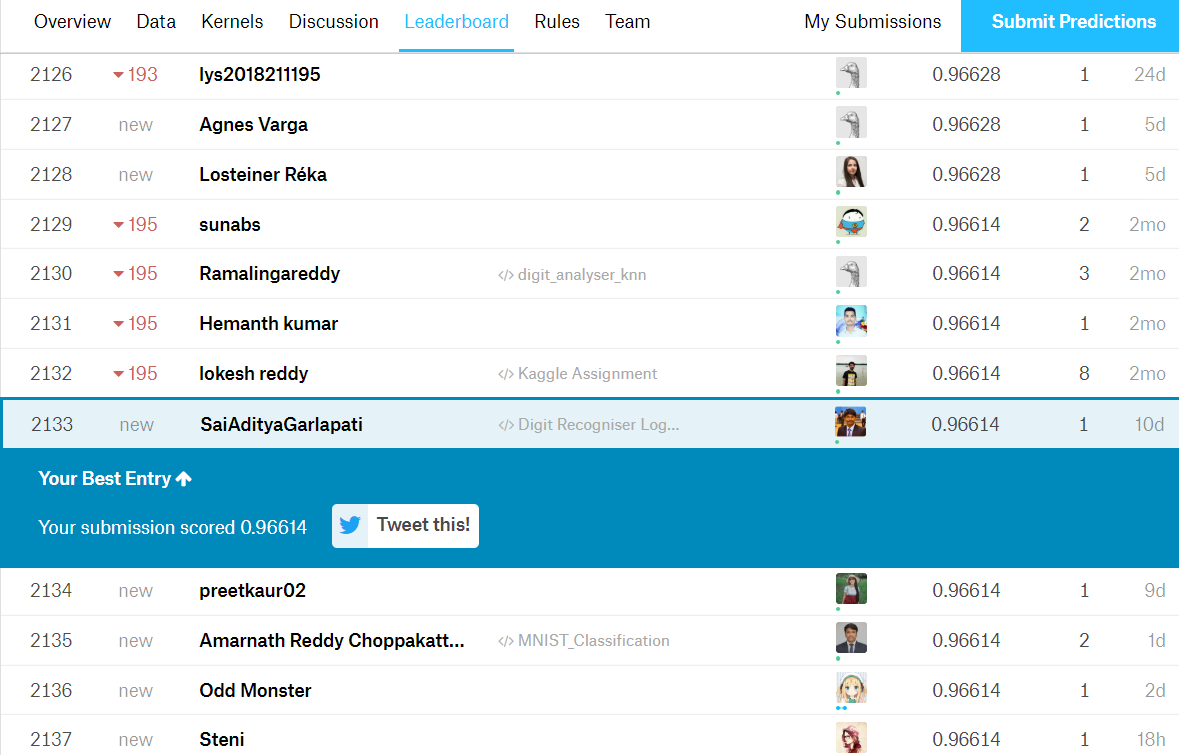